# Combine covariate tests GWAS results

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from upsetplot import UpSet
from upsetplot import plot

from sklearn.datasets import load_boston


In [2]:
# boston = load_boston()
# boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
# # Get five features most correlated with median house value
# correls = boston_df.corrwith(pd.Series(boston.target),
# method='spearman').sort_values()
# top_features = correls.index[-5:]
# # Get a binary indicator of whether each top feature is above average
# boston_above_avg = boston_df > boston_df.median(axis=0)
# boston_above_avg = boston_above_avg[top_features]
# boston_above_avg = boston_above_avg.rename(columns=lambda x: x + '>')
# # Make this indicator mask an index of boston_df
# boston_df = pd.concat([boston_df, boston_above_avg],
# axis=1)
# boston_df = boston_df.set_index(list(boston_above_avg.columns))
# # Also give us access to the target (median house value)
# boston_df = boston_df.assign(median_value=boston.target)
# # UpSet plot it!
# # upset = UpSet(boston_df[:10], subset_size='count', intersection_plot_elements=5)
# # upset.add_catplot(value='median_value', kind='strip', color='blue')
# # upset.add_catplot(value='AGE', kind='strip', color='black')
# # upset.plot()
# # plt.show()
# # boston_df[:10]
# boston_df


# print(ax.dendrogram_row.reordered_ind)
# new_group = []
# for pos in ax.dendrogram_row.reordered_ind:
#     new_group.append(list(groups)[pos])
# df_to_check = pd.DataFrame(new_group,columns=["PC","sex","year of birth","AC","batch"])
# temp = df_to_check["PC"]
# df_to_check = pd.get_dummies(df_to_check,columns=["PC"])
# df_to_check = df_to_check.astype(bool)
# df_to_check =df_to_check.set_index(list(df_to_check))
# df_fml = df_to_check
# plot(df_fml,sort_categories_by=None,with_lines=False,sort_by=None,element_size=15)

# plt.show()

In [3]:
# # df_to_check[:5]
#     res += str(vals[0]) + "-PC"
#     if vals[1] == 1:
#         res +="_sex"
#     if vals[2] == 1:
#         res +="_yearOfBirth"
#     if vals[3] == 1:
#         res +="_AC"
#     if vals[4] == 1:
#         res +="_batch"

In [4]:
# vals = [[True,True,False,True,True,3],[True,True,False,False,True,5]]
# df_fml = pd.DataFrame(vals,columns=["A","B","C","D","E","data"])
# df_fml = df_fml.set_index(["A","B","C","D","E"])


In [5]:
PROJECT_PATH = "/sci/archive/michall/roeizucker/covar_tests_non_coding_HADASSA_PLINK"
NUMBER_OF_PC = [0,1,5,10,20,40]
# /sci/archive/michall/roeizucker/covar_tests_non_coding_HADASSA_PLINK/results_hypertension.csv


In [6]:
name = "multiple sclerosis"
path = os.path.join(PROJECT_PATH,"results_Multiple_sclerosis.csv")
# path = os.path.join(PROJECT_PATH,"results_hypertension.csv")

# path = os.path.join(PROJECT_PATH,"results_Diastolic_blood_pressure.csv")

In [7]:
df = pd.read_csv(path,low_memory=False)


In [8]:
df['sex'] = df['sex'].fillna(0)
df['year_of_birth'] = df['year_of_birth'].fillna(0)
df['AC'] = df['AC'].fillna(0)
df['batch'] = df['batch'].fillna(0)

df["covars"] = df["covars"].fillna("")

In [9]:
p_val = 5*10**-5

number_of_variants = len(df[df["P"] < p_val]["ID"].unique())
df


,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,OR,LOG(OR)_SE,Z_STAT,P,sex,year_of_birth,AC,batch,covars,pc_num
0,1,752721,rs3131972,A,G,A,ADD,274178.0,0.954592,0.058078,-0.800151,0.423623,0.0,0.0,0.0,0.0,,1
1,1,801536,rs79373928,T,G,G,ADD,274178.0,0.770933,0.190665,-1.364460,0.172424,0.0,0.0,0.0,0.0,,1
2,1,834830,rs116452738,G,A,A,ADD,274178.0,0.918054,0.259264,-0.329774,0.741571,0.0,0.0,0.0,0.0,,1
3,1,835499,rs4422948,A,G,G,ADD,274178.0,1.057490,0.047244,1.183260,0.236706,0.0,0.0,0.0,0.0,,1
4,1,838555,rs4970383,C,A,A,ADD,274178.0,1.011690,0.047385,0.245280,0.806240,0.0,0.0,0.0,0.0,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41262434,22,51177257,rs73174437,C,T,T,ADD,274178.0,1.032530,0.106762,0.299831,0.764306,0.0,0.0,0.0,0.0,,0
41262435,22,51183255,rs5771002,A,G,A,ADD,274178.0,1.009570,0.043393,0.219390,0.826346,0.0,0.0,0.0,0.0,,0
41262436,22,51185848,rs3865764,G,A,G,ADD,274178.0,0.935166,0.096054,-0.697850,0.485271,0.0,0.0,0.0,0.0,,0
41262437,22,51193629,rs142680588,A,G,G,ADD,274178.0,1.054210,0.075539,0.698853,0.484644,0.0,0.0,0.0,0.0,,0


In [10]:
number_of_variants

978

In [11]:
number_of_unique_variants = len(df[df["P"] < p_val]["ID"].unique())

In [12]:
number_of_unique_variants

978

In [13]:
df_new = df[df["P"] < p_val].groupby(["sex","year_of_birth","AC","batch","pc_num"], dropna=False).count()[["POS"]]
df_new = df_new.reset_index()
df_wide_pc=pd.pivot(df_new, index=["pc_num"], columns = ["sex","year_of_birth","AC","batch"],values = 'POS') #Reshape from long to wide
df_wide_pc.reset_index()
df_wide_pc["mean"] = df_wide_pc.mean(axis=1)
df_wide_pc[["mean"]]

sex,mean
year_of_birth,
AC,
batch,
pc_num,
0,948.8125
1,948.5000
5,949.8750
10,948.2500
20,951.8750
40,956.3750


In [14]:
pd.set_option('display.max_rows', 80)
df_new = df[df["P"] < p_val].groupby(["sex","year_of_birth","AC","batch","pc_num"], dropna=False).count()[["POS"]]
df_new = df_new.reset_index()
df_wide=pd.pivot(df_new, index=["sex","year_of_birth","AC","batch"], columns = 'pc_num',values = 'POS') #Reshape from long to wide
df_wide = df_wide.reset_index()
# print(df_wide)
df_wide["binary_covar_sum"] = df_wide["sex"] + df_wide["year_of_birth"] + df_wide["AC"] + df_wide["batch"]
# print(df_wide)
# df_wide
for col in ["sex","year_of_birth","AC","batch"]:
    print(df_wide.sort_values(by="binary_covar_sum").groupby(col).mean()[NUMBER_OF_PC])
df_wide["mean"] = df_wide.mean(axis=1)
df_wide.reset_index()
# df_wide

# table where cols are different combination of covars.
# have rows differing by binary covarites, and cols differ by number of PC.
# each cell will have the number of significant variants

pc_num        0      1       5       10       20      40
sex                                                     
0.0     945.000  944.5  944.50  943.625  947.625  952.50
1.0     952.625  952.5  955.25  952.875  956.125  960.25
pc_num               0      1        5       10      20       40
year_of_birth                                                   
0.0            947.625  947.5  948.875  947.625  951.00  954.625
1.0            950.000  949.5  950.875  948.875  952.75  958.125
pc_num        0        1        5      10      20       40
AC                                                        
0.0     949.125  949.125  949.875  947.75  952.00  957.375
1.0     948.500  947.875  949.875  948.75  951.75  955.375
pc_num        0        1       5       10       20       40
batch                                                      
0.0     949.500  949.375  950.25  949.125  952.125  956.875
1.0     948.125  947.625  949.50  947.375  951.625  955.875


pc_num,index,sex,year_of_birth,AC,batch,0,1,5,10,20,40,binary_covar_sum,mean
0,0,0.0,0.0,0.0,0.0,946,945,944,946,951,951,0.0,516.636364
1,1,0.0,0.0,0.0,1.0,944,944,943,941,945,951,1.0,515.454545
2,2,0.0,0.0,1.0,0.0,943,942,945,946,948,951,1.0,516.090909
3,3,0.0,0.0,1.0,1.0,941,941,941,940,942,947,2.0,514.181818
4,4,0.0,1.0,0.0,0.0,946,946,945,943,947,959,1.0,517.090909
5,5,0.0,1.0,0.0,1.0,950,950,951,947,952,954,2.0,518.909091
6,6,0.0,1.0,1.0,0.0,946,945,944,944,947,954,2.0,516.727273
7,7,0.0,1.0,1.0,1.0,944,943,943,942,949,953,3.0,516.363636
8,8,1.0,0.0,0.0,0.0,950,951,953,951,954,962,1.0,520.272727
9,9,1.0,0.0,0.0,1.0,951,952,952,949,955,957,2.0,520.000000


In [15]:
df_norm = df_wide / number_of_unique_variants
for col in ["sex","year_of_birth","AC","batch"]:
    print(df_norm.sort_values(by="binary_covar_sum").groupby(col).mean()[NUMBER_OF_PC])

df_norm[[0,1,5,10,20,40]]

pc_num           0         1         5        10        20        40
sex                                                                 
0.000000  0.966258  0.965746  0.965746  0.964852  0.968942  0.973926
0.001022  0.974054  0.973926  0.976738  0.974310  0.977633  0.981851
pc_num                0         1         5        10        20        40
year_of_birth                                                            
0.000000       0.968942  0.968814  0.970220  0.968942  0.972393  0.976099
0.001022       0.971370  0.970859  0.972265  0.970220  0.974182  0.979678
pc_num           0         1         5        10        20        40
AC                                                                  
0.000000  0.970475  0.970475  0.971242  0.969070  0.973415  0.978911
0.001022  0.969836  0.969197  0.971242  0.970092  0.973160  0.976866
pc_num           0         1         5        10        20        40
batch                                                               
0.000000  0.97

pc_num,0,1,5,10,20,40
0,0.967280,0.966258,0.965235,0.967280,0.972393,0.972393
1,0.965235,0.965235,0.964213,0.962168,0.966258,0.972393
2,0.964213,0.963190,0.966258,0.967280,0.969325,0.972393
3,0.962168,0.962168,0.962168,0.961145,0.963190,0.968303
4,0.967280,0.967280,0.966258,0.964213,0.968303,0.980573
5,0.971370,0.971370,0.972393,0.968303,0.973415,0.975460
6,0.967280,0.966258,0.965235,0.965235,0.968303,0.975460
7,0.965235,0.964213,0.964213,0.963190,0.970348,0.974438
8,0.971370,0.972393,0.974438,0.972393,0.975460,0.983640
9,0.972393,0.973415,0.973415,0.970348,0.976483,0.978528


In [16]:
print(df_norm[[0,1,5,10,20,40]].min().min())
print(df_norm.max().max())

0.9611451942740287
0.9846625766871165


### check variant intesection

In [17]:
covars = ["sex","year_of_birth","AC","batch"]

pc_num = [0,1,5,10,20,40]
groups = {}
for num in pc_num:
    df_num = df[df["pc_num"] == num]
    for sex in [0,1]:
        df_sex = df_num[df_num["sex"] == sex]
        for yob in [0,1]:
            df_yob = df_sex[df_sex["year_of_birth"] == yob]
            for ac in [0,1]:
                df_ac = df_yob[df_yob["AC"] == ac]
                for batch in [0,1]:
                    df_batch = df_ac[df_ac["batch"] == batch]
                    groups[(num,sex,yob,ac,batch)] = set((df_batch[df_batch["P"] < p_val])["ID"])
                    
        

In [18]:
vals = []
for groupA in groups:
    vals.append([])
    for groupB in groups:
        if len(groups[groupA].union(groups[groupB])) == 0:
            vals[-1].append(np.nan)
        else:
            vals[-1].append(len(groups[groupA].symmetric_difference(groups[groupB]))/len(groups[groupA].union(groups[groupB])))
#         if vals[-1][-1] < 0.3:
#             vals[-1][-1] = 0.3
#         print(groupA,groupB,len(groups[groupA].symmetric_difference(groups[groupB])))

In [19]:
def mapper(vals):
    res = ""
    res += str(vals[0]) + "-PC"
    if vals[1] == 1:
        res +="_sex"
    if vals[2] == 1:
        res +="_yearOfBirth"
    if vals[3] == 1:
        res +="_AC"
    if vals[4] == 1:
        res +="_batch"
    return res
full_string = "■"
empty_string = "□"

def mapper_visual_first(vals):
    res = ""
    res += str(vals[0]) + "-"

    for i in range(1,len(vals)):
        if vals[i] == 1:
            res+=full_string
        else:
            res+=empty_string
    return res
def mapper_visual_last(vals):
    res = ""

    for i in range(1,len(vals)):
        if vals[i] == 1:
            res+=full_string
        else:
            res+=empty_string
    res += "-" + str(vals[0])

#     if vals[1] == 1:
#         res +="_sex"
#     if vals[2] == 1:
#         res +="_yearOfBirth"
#     if vals[3] == 1:
#         res +="_AC"
#     if vals[4] == 1:
#         res +="_batch"
    return res

mapper(list(groups)[1])
lables = list(map(mapper,list(groups)))
lables_vis = list(map(mapper_visual_first,list(groups)))
lables_vis_last = list(map(mapper_visual_last,list(groups)))


lables_1 = list(groups)

/cs/labs/michall/roeizucker/fml_virt_env/lib/python3.7/site-packages/seaborn/matrix.py:531: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


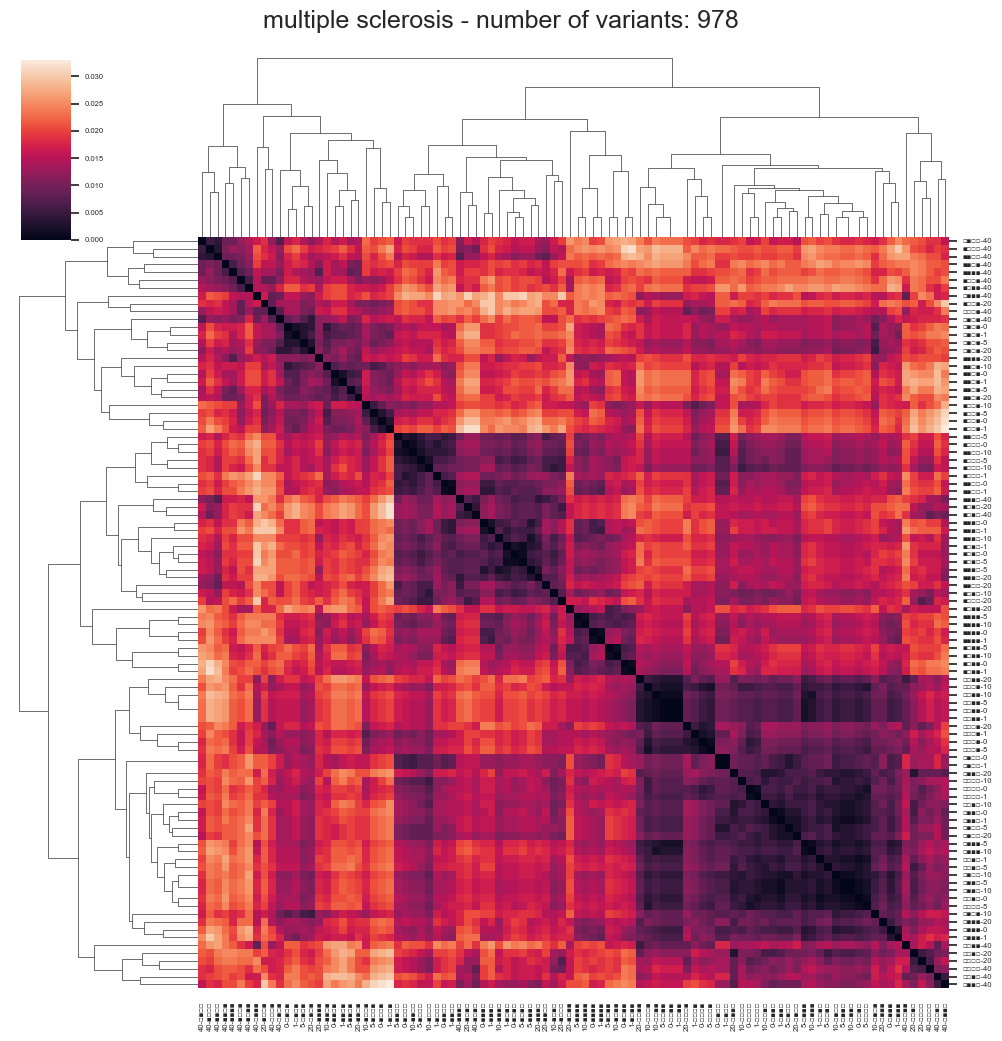

In [20]:
df_o = pd.DataFrame(vals,columns=lables_vis,index=lables_vis_last)
sns.set(font_scale=0.5)

ax = sns.clustermap(df_o, xticklabels=True, yticklabels=True)

ax.fig.suptitle(f"{name} - number of variants: {number_of_variants}",y=1.03,size=18) 
plt.show()

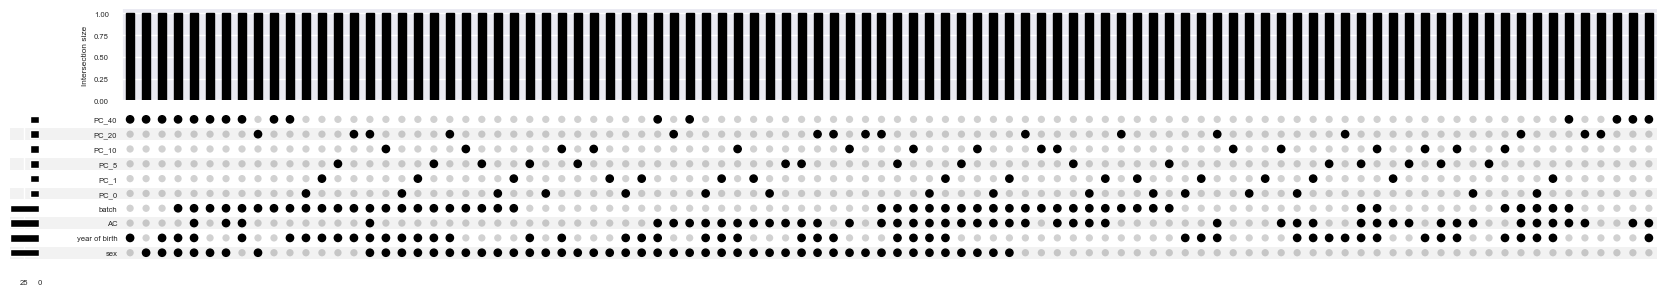

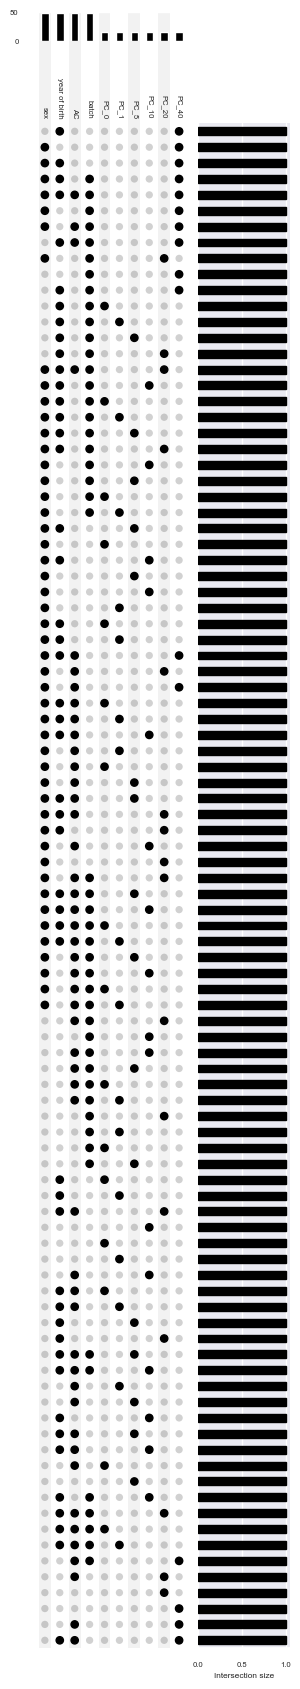

In [21]:
new_group = []
for pos in ax.dendrogram_row.reordered_ind:
    new_group.append(list(groups)[pos])
df_to_check = pd.DataFrame(new_group,columns=["PC","sex","year of birth","AC","batch"])
temp = df_to_check["PC"]
df_to_check = pd.get_dummies(df_to_check,columns=["PC"])
df_to_check = df_to_check.astype(bool)
df_to_check =df_to_check.set_index(list(df_to_check))
df_fml = df_to_check
plot(df_fml,sort_categories_by=None,with_lines=False,sort_by=None,element_size=15)
plt.show()

plot(df_fml,sort_categories_by=None,with_lines=False,sort_by=None,element_size=15,orientation='vertical')
plt.show()

In [22]:
input()

''

In [23]:
# res += str(vals[0]) + "-PC"
# if vals[1] == 1:
#     res +="_sex"
# if vals[2] == 1:
#     res +="_yearOfBirth"
# if vals[3] == 1:
#     res +="_AC"
# if vals[4] == 1:
#     res +="_batch"

In [24]:
# (num,sex,yob,ac,batch)
# print(groups[(1,1,0,0,0)])
# print(groups[(0,0,1,1,0)])
print("intersection",len(groups[(1,1,0,0,0)].intersection(groups[(0,0,1,1,0)])))
print("groups[(1,1,0,0,0)]", len(groups[(1,1,0,0,0)]))
print("groups[(0,0,1,1,0)]",len(groups[(0,0,1,1,0)]))


intersection 942
groups[(1,1,0,0,0)] 951
groups[(0,0,1,1,0)] 946


In [25]:
covars = ["sex","year_of_birth","AC","batch"]
pc_num = [0,1,5,10,20,40]
group_compare = {}

for sex in [0,1]:
#     df_sex = df[df["sex"] == sex]
    for yob in [0,1]:
#         df_yob = df_sex[df_sex["year_of_birth"] == yob]
        for ac in [0,1]:
#             df_ac = df_yob[df_yob["AC"] == ac]
            for batch in [0,1]:
#                 df_batch = df_ac[df_ac["batch"] == batch]
                values = []
                for num in pc_num:
                    values.append([])
                    for num2 in pc_num:
                        values[-1].append(len(groups[(num,sex,yob,ac,batch)].symmetric_difference(groups[(num2,sex,yob,ac,batch)])) / len(groups[(num,sex,yob,ac,batch)].union(groups[(num2,sex,yob,ac,batch)])))
                group_compare[(sex,yob,ac,batch)] = values
                    

per-PC


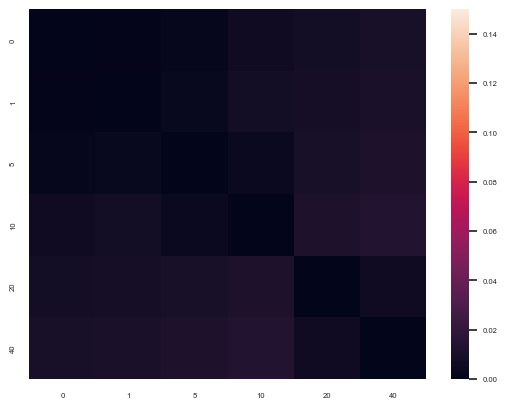

per-PC_batch


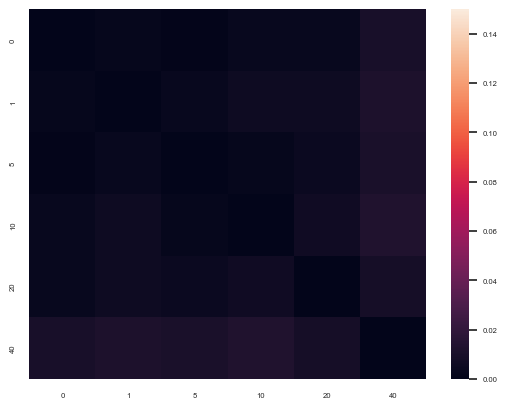

per-PC_AC


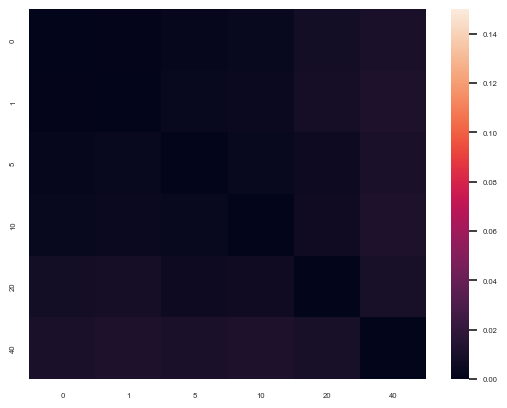

per-PC_AC_batch


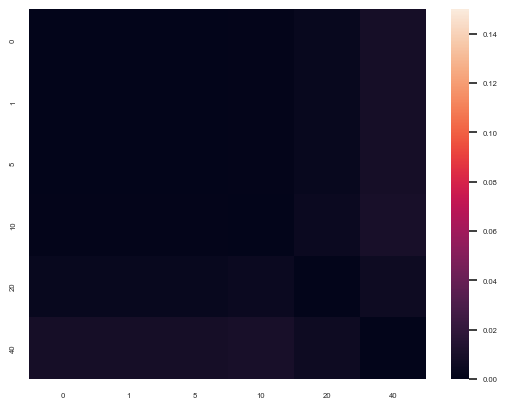

per-PC_yearOfBirth


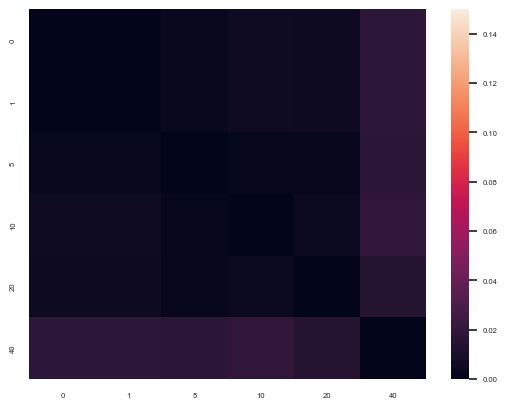

per-PC_yearOfBirth_batch


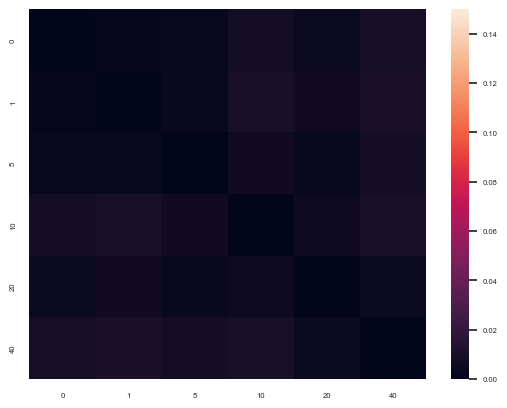

per-PC_yearOfBirth_AC


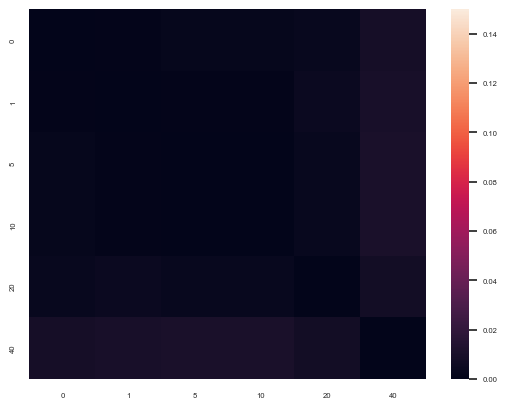

per-PC_yearOfBirth_AC_batch


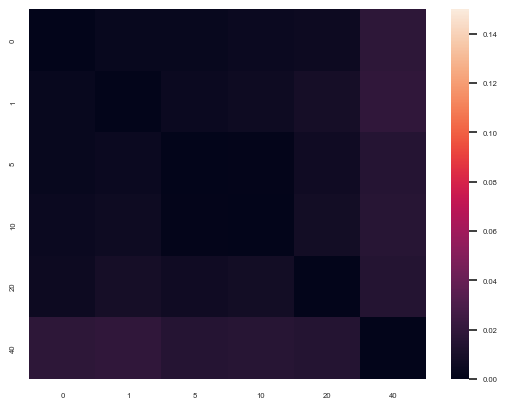

per-PC_sex


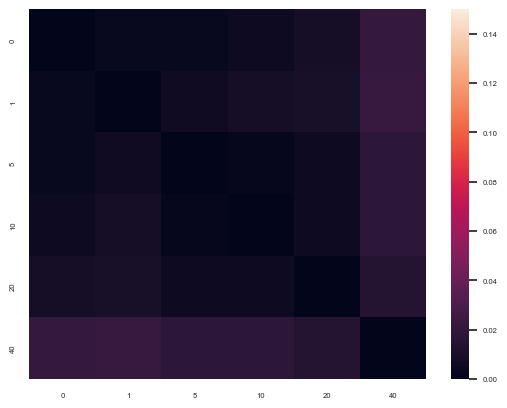

per-PC_sex_batch


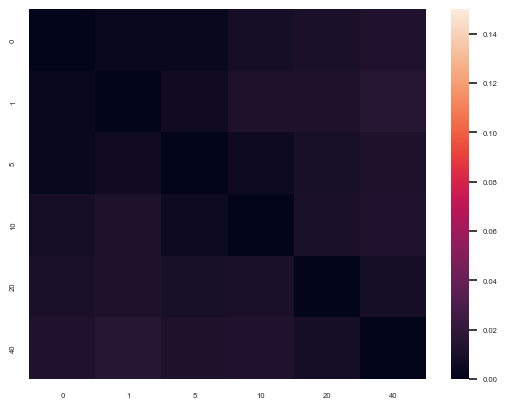

per-PC_sex_AC


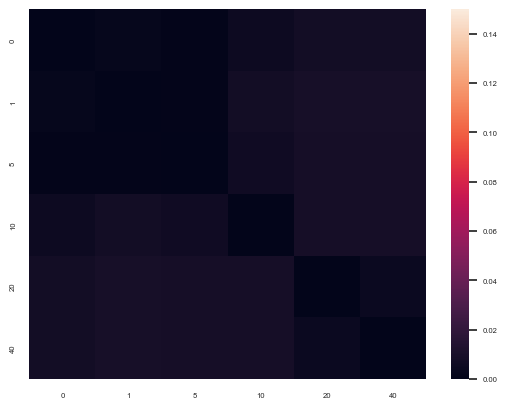

per-PC_sex_AC_batch


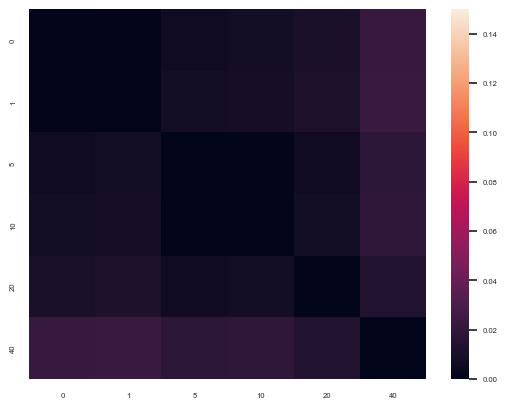

per-PC_sex_yearOfBirth


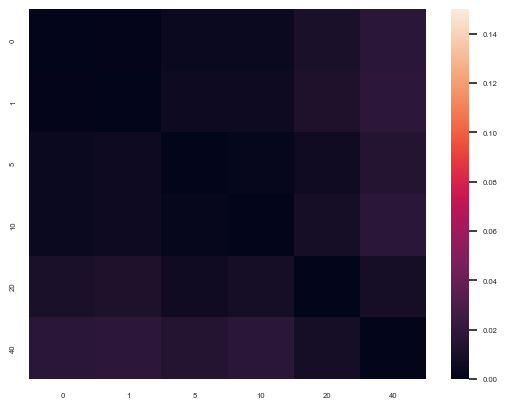

per-PC_sex_yearOfBirth_batch


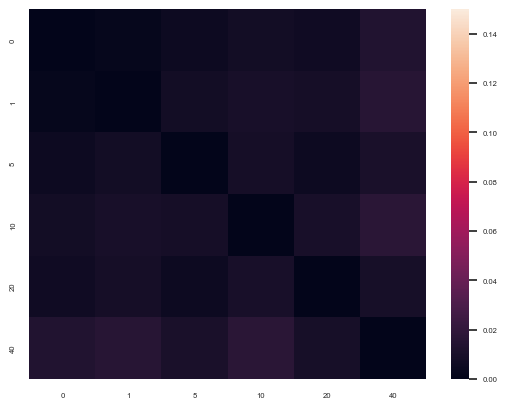

per-PC_sex_yearOfBirth_AC


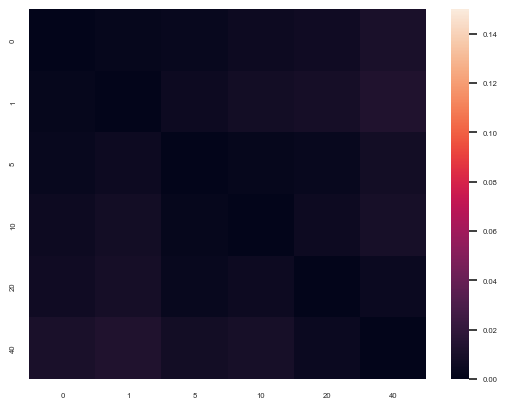

per-PC_sex_yearOfBirth_AC_batch


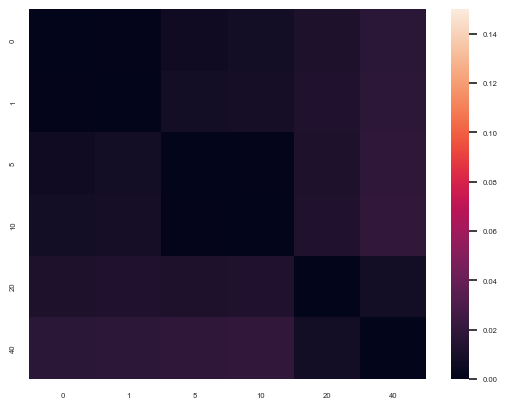

In [26]:
for val in group_compare:
    print(mapper(["per"] +list(val)))
    df_curr = pd.DataFrame(group_compare[val],index=pc_num,columns=pc_num)
    sns.heatmap(df_curr,vmin=0, vmax=0.15)
    plt.show()

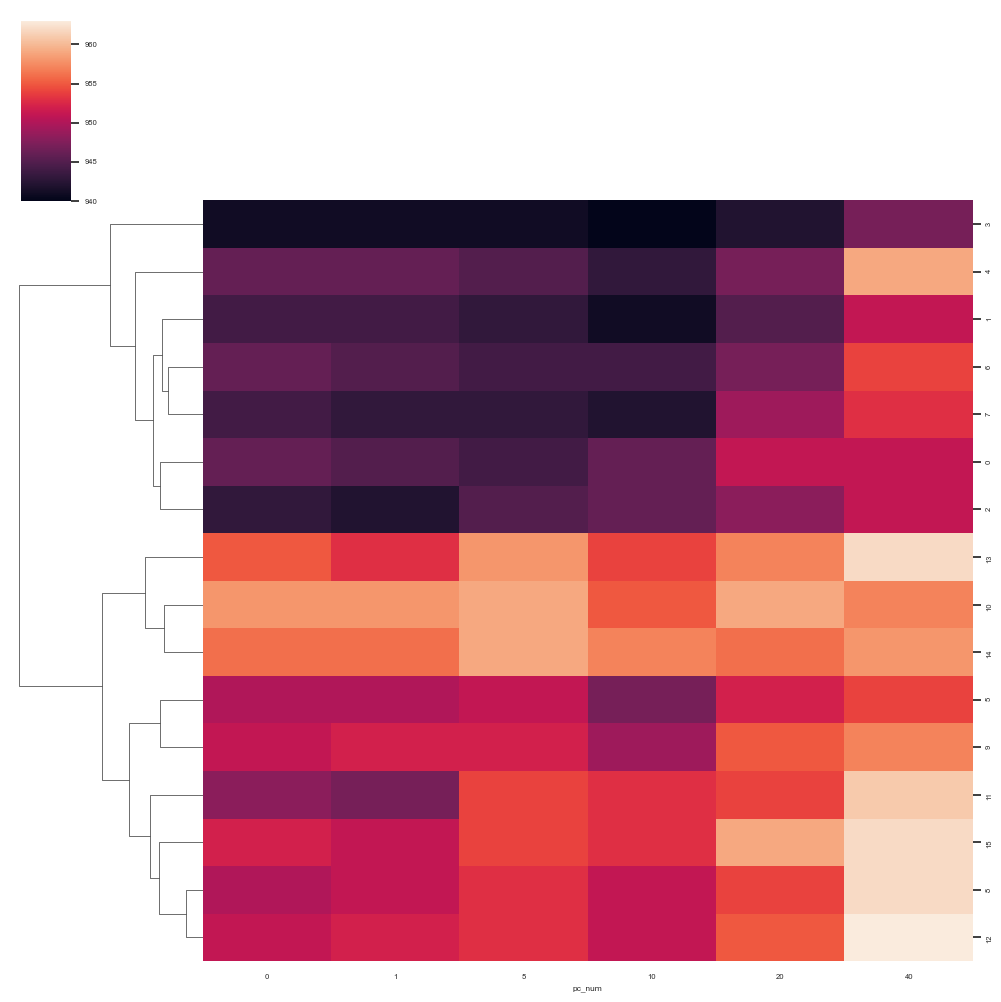

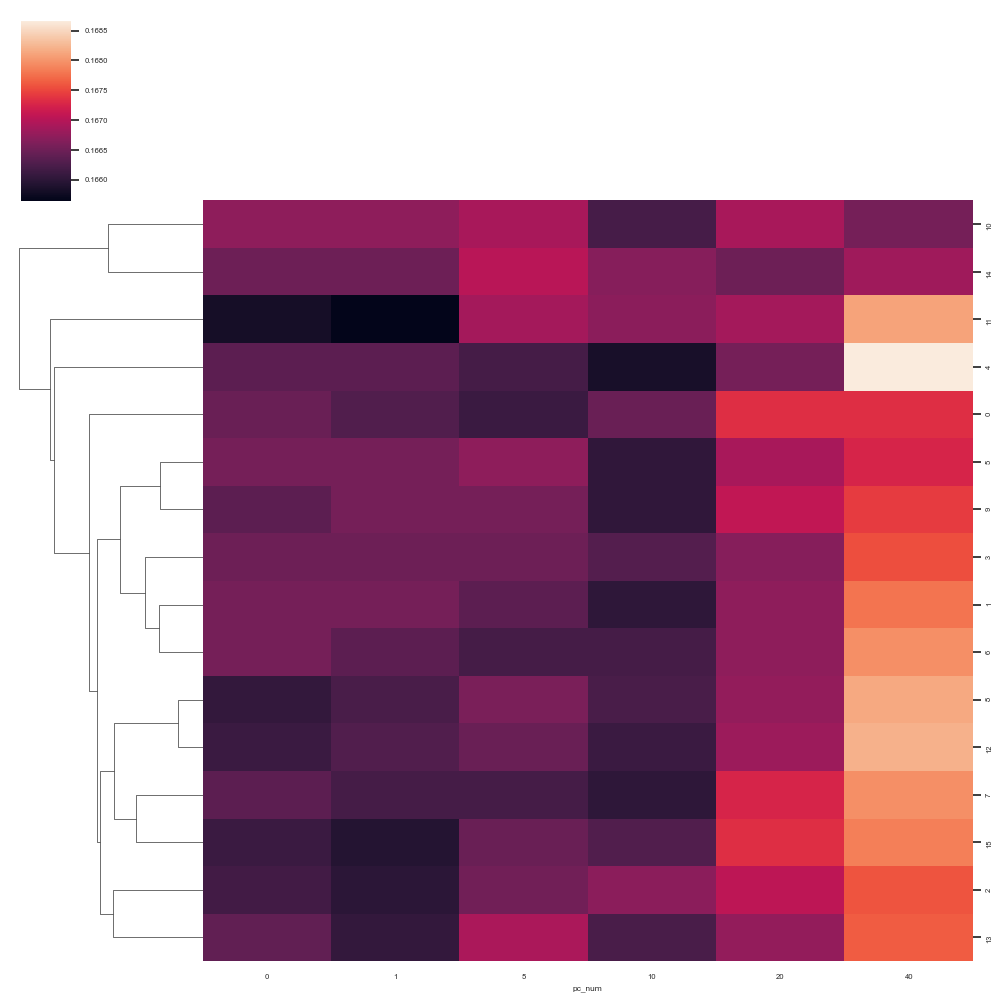

pc_num,0,1,5,10,20,40
0,0.166461,0.166285,0.166109,0.166461,0.167341,0.167341
1,0.166549,0.166549,0.166373,0.166020,0.166725,0.167784
2,0.166167,0.165991,0.166520,0.166696,0.167048,0.167577
3,0.166490,0.166490,0.166490,0.166313,0.166667,0.167551
4,0.166374,0.166374,0.166198,0.165846,0.166549,0.168660
5,0.166550,0.166550,0.166725,0.166024,0.166900,0.167251
6,0.166549,0.166373,0.166197,0.166197,0.166725,0.167958
7,0.166373,0.166197,0.166197,0.166020,0.167254,0.167959
8,0.166055,0.166230,0.166579,0.166230,0.166754,0.168152
9,0.166375,0.166550,0.166550,0.166025,0.167075,0.167425


In [27]:
df_wide[[0,1,5,10,20,40]]
df_new = df_wide[[0,1,5,10,20,40]]
df_norm = df_new.div(df_new.sum(axis=1), axis=0)

ax = sns.clustermap(df_new,col_cluster=False)
plt.show()
ax = sns.clustermap(df_norm,col_cluster=False)
plt.show()
df_norm
# plt.imshow(df_new, cmap='hot', interpolation='nearest')
# plt.show()
# print(df_new)

In [28]:
df[(df["pc_num"] == 0) & (df["batch"] == 0) & (df["AC"] == 0) & (df["year_of_birth"] == 0) & (df["sex"] == 0)].head(10)

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,OR,LOG(OR)_SE,Z_STAT,P,sex,year_of_birth,AC,batch,covars,pc_num
3587200,1,752721,rs3131972,A,G,A,ADD,274178.0,0.954129,0.058067,-0.808647,0.418718,0.0,0.0,0.0,0.0,,0
3587201,1,801536,rs79373928,T,G,G,ADD,274178.0,0.770963,0.190663,-1.364270,0.172484,0.0,0.0,0.0,0.0,,0
3587202,1,834830,rs116452738,G,A,A,ADD,274178.0,0.917427,0.259257,-0.332422,0.739571,0.0,0.0,0.0,0.0,,0
3587203,1,835499,rs4422948,A,G,G,ADD,274178.0,1.057270,0.047249,1.178720,0.238511,0.0,0.0,0.0,0.0,,0
3587204,1,838555,rs4970383,C,A,A,ADD,274178.0,1.011460,0.047374,0.240539,0.809912,0.0,0.0,0.0,0.0,,0
3587205,1,840753,rs4970382,T,C,C,ADD,274178.0,1.032880,0.041614,0.777359,0.436947,0.0,0.0,0.0,0.0,,0
3587206,1,846864,rs950122,G,C,C,ADD,274178.0,0.999295,0.051393,-0.013723,0.989051,0.0,0.0,0.0,0.0,,0
3587207,1,849998,rs13303222,A,G,A,ADD,274178.0,1.021750,0.052928,0.406563,0.684329,0.0,0.0,0.0,0.0,,0
3587208,1,850780,rs6657440,C,T,C,ADD,274178.0,1.017490,0.041837,0.414365,0.678607,0.0,0.0,0.0,0.0,,0
3587209,1,851390,rs72631889,G,T,T,ADD,274178.0,0.920886,0.105921,-0.778124,0.436496,0.0,0.0,0.0,0.0,,0


In [29]:
print(len(df["ID"].unique()))
print(len(df[df["P"] < p_val]["ID"].unique()))

429821
978


In [30]:
p_val

5e-05

In [31]:
len(df[df["P"] < 5*10**-3]["ID"].unique())

4283

In [32]:
input()
path_MS = os.path.join(PROJECT_PATH,"results_Multiple_sclerosis.csv")
path_HT = os.path.join(PROJECT_PATH,"results_hypertension.csv")
path_DBP = os.path.join(PROJECT_PATH,"results_Diastolic_blood_pressure.csv")

In [33]:
df_MS = pd.read_csv(path_MS,low_memory=False)
df_HT = pd.read_csv(path_HT,low_memory=False)
df_DBP = pd.read_csv(path_DBP,low_memory=False)

In [34]:
df_DBP["sex"].value_counts()

1.0    22435536
0.0    21968129
Name: sex, dtype: int64

In [35]:
def fill_nans(df):
    df['sex'] = df['sex'].fillna(0)
    df['year_of_birth'] = df['year_of_birth'].fillna(0)
    df['AC'] = df['AC'].fillna(0)
    df['batch'] = df['batch'].fillna(0)

    df["covars"] = df["covars"].fillna("")
    return df
df_MS = fill_nans(df_MS)
df_HT = fill_nans(df_HT)
df_DBP = fill_nans(df_DBP)

In [36]:
pd.melt( df_MS[(df_MS["sex"] == 0) & (df_MS["year_of_birth"] == 0) & (df_MS["AC"] == 0) & (df_MS["batch"] == 0)],id_vars=['ID'], value_vars=['pc_num','P'])

,ID,variable,value
0,rs3131972,pc_num,1.000000
1,rs79373928,pc_num,1.000000
2,rs116452738,pc_num,1.000000
3,rs4422948,pc_num,1.000000
4,rs4970383,pc_num,1.000000
...,...,...,...
5157799,rs73174437,P,0.764306
5157800,rs5771002,P,0.826346
5157801,rs3865764,P,0.485271
5157802,rs142680588,P,0.484644


In [37]:
def make_small_df(df):
    return df[(df["sex"] == 0) & (df["year_of_birth"] == 0) & (df["AC"] == 0) & (df["batch"] == 0)]

df_MS_small = make_small_df(df_MS)
df_HT_small = make_small_df(df_HT)
df_DBP_small = make_small_df(df_DBP)



In [38]:
# pd.pivot(df_MS_small, index=["ID"], columns = 'pc_num',values = 'P') #Reshape from long to wide
dfs = [df_MS_small,df_HT_small,df_DBP_small]
names = ["MS","HT","DBP"]

In [39]:
list_of_sig = []
for df in dfs:
    list_of_sig.append([])
    num_of_unique = len(df[df["P"] < p_val]["ID"].unique())
    for num in NUMBER_OF_PC:
        list_of_sig[-1].append(len(df[(df["pc_num"] == num) & (df["P"] <= p_val)]) / num_of_unique)

In [40]:
list_of_sig

[[0.9885057471264368,
  0.987460815047022,
  0.9864158829676071,
  0.9885057471264368,
  0.9937304075235109,
  0.9937304075235109],
 [0.8833955223880597,
  0.8768656716417911,
  0.7873134328358209,
  0.7779850746268657,
  0.7593283582089553,
  0.7481343283582089],
 [0.9535972754363559,
  0.9540229885057471,
  0.9561515538527032,
  0.9501915708812261,
  0.9489144316730523,
  0.9472115793954874]]

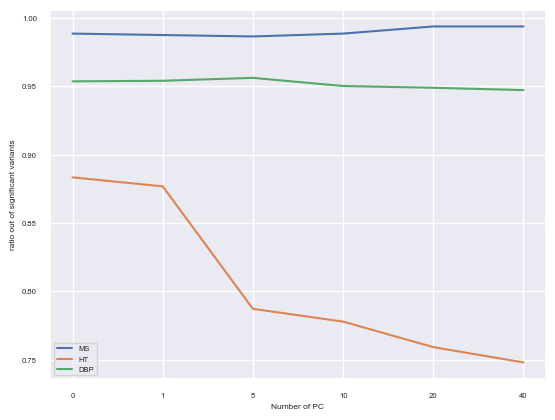

In [41]:
for i in range(len(list_of_sig)):
    plt.plot(list_of_sig[i],label  = names[i])
plt.xticks(range(len(NUMBER_OF_PC)),NUMBER_OF_PC)
plt.xlabel("Number of PC")
plt.ylabel("ratio out of significant variants")

plt.legend()
plt.show()

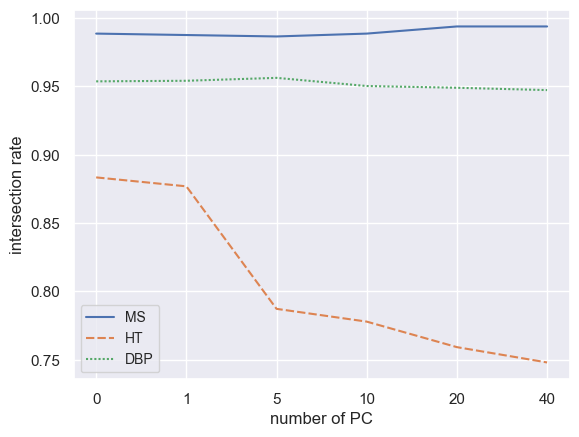

In [72]:
df = pd.DataFrame(np.array(list_of_sig).T,columns=names)
g = sns.lineplot(data=df)
g.set_xticks(range(len(df)))
g.set_xticklabels(NUMBER_OF_PC)
g.set(xlabel='number of PC',
       ylabel='intersection rate')
plt.legend( fontsize = "10")
plt.show()

In [71]:
df

,MS,HT,DBP
0,0.988506,0.883396,0.953597
1,0.987461,0.876866,0.954023
2,0.986416,0.787313,0.956152
3,0.988506,0.777985,0.950192
4,0.993730,0.759328,0.948914
5,0.993730,0.748134,0.947212
